In [24]:
import atomsci
import deepchem as dc
import warnings
warnings.filterwarnings('ignore')
import json
import numpy as np
import pandas as pd
import os
import requests
import sys
import io

In [17]:
from atomsci.ddm.pipeline import parameter_parser as parse
from atomsci.ddm.pipeline import perf_data
from atomsci.ddm.pipeline import model_pipeline as mp
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.utils.struct_utils as struct_utils
from atomsci.ddm.pipeline import perf_plots as pp

In [26]:
os.getcwd()

'/home/jupyter/Summer_AMPL/Renate/QMUGS/Optimal_Model'

In [28]:
working_dir = os.getcwd()

In [30]:
raw_df = pd.read_csv('qm9__curated-Copy1.csv')

In [31]:
raw_df.shape

(129435, 13)

In [32]:
raw_df.columns

Index(['mol_id', 'smiles', 'homo', 'lumo', 'gap', 'rdkit_smiles', 'inchi_key',
       'compound_id', 'mol_wt', 'VALUE_NUM_mean', 'VALUE_NUM_std', 'Perc_Var',
       'Remove_BadDuplicate'],
      dtype='object')

In [10]:
select_df = raw_df[['chembl_id','smiles','mw','GFN2_HOMO_LUMO_GAP','DFT_HOMO_LUMO_GAP', 'rdkit_smiles', 'inchi_key', 'compound_id']]
select_df.shape

(1323962, 8)

In [11]:
select_df.head()

,chembl_id,smiles,mw,GFN2_HOMO_LUMO_GAP,DFT_HOMO_LUMO_GAP,rdkit_smiles,inchi_key,compound_id
0,CHEMBL1,[H]c1c([H])c2c(c([H])c1OC([H])([H])[H])OC([H])...,544.209718,0.044924,0.242930,COc1ccc2c(c1)OC[C@H]1[C@@H]2C2=C(OC1(C)C)C1=C(...,GHBOEFUAGSHXPO-XZOTUCIWSA-N,GHBOEFUAGSHXPO-XZOTUCIWSA-N
1,CHEMBL1,[H]c1c([H])c2c(c([H])c1OC([H])([H])[H])OC([H])...,544.209718,0.044332,0.242112,COc1ccc2c(c1)OC[C@H]1[C@@H]2C2=C(OC1(C)C)C1=C(...,GHBOEFUAGSHXPO-XZOTUCIWSA-N,GHBOEFUAGSHXPO-XZOTUCIWSA-N
2,CHEMBL1,[H]c1c([H])c2c(c([H])c1OC([H])([H])[H])OC([H])...,544.209718,0.043292,0.241264,COc1ccc2c(c1)OC[C@H]1[C@@H]2C2=C(OC1(C)C)C1=C(...,GHBOEFUAGSHXPO-XZOTUCIWSA-N,GHBOEFUAGSHXPO-XZOTUCIWSA-N
3,CHEMBL1000,[H]OC(=O)C([H])([H])OC([H])([H])C([H])([H])N1C...,388.155370,0.115170,0.340824,O=C(O)COCCN1CCN([C@@H](c2ccccc2)c2ccc(Cl)cc2)CC1,ZKLPARSLTMPFCP-NRFANRHFSA-N,ZKLPARSLTMPFCP-NRFANRHFSA-N
4,CHEMBL1000,[H]OC(=O)C([H])([H])OC([H])([H])C([H])([H])N1C...,388.155370,0.101608,0.330228,O=C(O)COCCN1CCN([C@@H](c2ccccc2)c2ccc(Cl)cc2)CC1,ZKLPARSLTMPFCP-NRFANRHFSA-N,ZKLPARSLTMPFCP-NRFANRHFSA-N


In [11]:
## Use this to save your above file as a .csv, so you can skip in future.
select_df.to_csv('select_qmugs_data.csv')


In [16]:
select_df.head()

,chembl_id,smiles,mw,GFN2_HOMO_LUMO_GAP,DFT_HOMO_LUMO_GAP,rdkit_smiles,inchi_key
0,CHEMBL1,[H]c1c([H])c2c(c([H])c1OC([H])([H])[H])OC([H])...,544.209718,0.044924,0.242930,COc1ccc2c(c1)OC[C@H]1[C@@H]2C2=C(OC1(C)C)C1=C(...,GHBOEFUAGSHXPO-XZOTUCIWSA-N
1,CHEMBL1,[H]c1c([H])c2c(c([H])c1OC([H])([H])[H])OC([H])...,544.209718,0.044332,0.242112,COc1ccc2c(c1)OC[C@H]1[C@@H]2C2=C(OC1(C)C)C1=C(...,GHBOEFUAGSHXPO-XZOTUCIWSA-N
2,CHEMBL1,[H]c1c([H])c2c(c([H])c1OC([H])([H])[H])OC([H])...,544.209718,0.043292,0.241264,COc1ccc2c(c1)OC[C@H]1[C@@H]2C2=C(OC1(C)C)C1=C(...,GHBOEFUAGSHXPO-XZOTUCIWSA-N
3,CHEMBL1000,[H]OC(=O)C([H])([H])OC([H])([H])C([H])([H])N1C...,388.155370,0.115170,0.340824,O=C(O)COCCN1CCN([C@@H](c2ccccc2)c2ccc(Cl)cc2)CC1,ZKLPARSLTMPFCP-NRFANRHFSA-N
4,CHEMBL1000,[H]OC(=O)C([H])([H])OC([H])([H])C([H])([H])N1C...,388.155370,0.101608,0.330228,O=C(O)COCCN1CCN([C@@H](c2ccccc2)c2ccc(Cl)cc2)CC1,ZKLPARSLTMPFCP-NRFANRHFSA-N


In [12]:
select_df['rdkit_smiles'] = select_df['smiles'].apply(curate_data.base_smiles_from_smiles)

KeyboardInterrupt: 

In [ ]:
select_df['inchi_key'] = select_df['smiles'].apply(struct_utils.smiles_to_inchi_key)

In [17]:
##Same thing
select_df.to_csv('select_qmugs_data_complete.csv ')

In [ ]:
#current start
select_df = pd.read_csv('select_qmugs_data_complete.csv')

In [13]:
select_df['compound_id'] = select_df['inchi_key']

In [14]:
select_df.head()

,chembl_id,smiles,mw,GFN2_HOMO_LUMO_GAP,DFT_HOMO_LUMO_GAP,rdkit_smiles,inchi_key,compound_id
0,CHEMBL1,[H]c1c([H])c2c(c([H])c1OC([H])([H])[H])OC([H])...,544.209718,0.044924,0.242930,COc1ccc2c(c1)OC[C@H]1[C@@H]2C2=C(OC1(C)C)C1=C(...,GHBOEFUAGSHXPO-XZOTUCIWSA-N,GHBOEFUAGSHXPO-XZOTUCIWSA-N
1,CHEMBL1,[H]c1c([H])c2c(c([H])c1OC([H])([H])[H])OC([H])...,544.209718,0.044332,0.242112,COc1ccc2c(c1)OC[C@H]1[C@@H]2C2=C(OC1(C)C)C1=C(...,GHBOEFUAGSHXPO-XZOTUCIWSA-N,GHBOEFUAGSHXPO-XZOTUCIWSA-N
2,CHEMBL1,[H]c1c([H])c2c(c([H])c1OC([H])([H])[H])OC([H])...,544.209718,0.043292,0.241264,COc1ccc2c(c1)OC[C@H]1[C@@H]2C2=C(OC1(C)C)C1=C(...,GHBOEFUAGSHXPO-XZOTUCIWSA-N,GHBOEFUAGSHXPO-XZOTUCIWSA-N
3,CHEMBL1000,[H]OC(=O)C([H])([H])OC([H])([H])C([H])([H])N1C...,388.155370,0.115170,0.340824,O=C(O)COCCN1CCN([C@@H](c2ccccc2)c2ccc(Cl)cc2)CC1,ZKLPARSLTMPFCP-NRFANRHFSA-N,ZKLPARSLTMPFCP-NRFANRHFSA-N
4,CHEMBL1000,[H]OC(=O)C([H])([H])OC([H])([H])C([H])([H])N1C...,388.155370,0.101608,0.330228,O=C(O)COCCN1CCN([C@@H](c2ccccc2)c2ccc(Cl)cc2)CC1,ZKLPARSLTMPFCP-NRFANRHFSA-N,ZKLPARSLTMPFCP-NRFANRHFSA-N


In [15]:
print("NA SMILES:", (select_df.smiles=='').sum()+select_df.smiles.isna().sum())
select_df.drop(select_df[select_df.smiles == ""].index, inplace=True)
select_df.drop(select_df[select_df.smiles.isna()].index, inplace=True)

NA SMILES: 0


In [16]:
print("NA GAP:", (select_df.GFN2_HOMO_LUMO_GAP=='').sum()+select_df.GFN2_HOMO_LUMO_GAP.isna().sum())
select_df.drop(select_df[select_df.GFN2_HOMO_LUMO_GAP == ""].index, inplace=True)
select_df.drop(select_df[select_df.GFN2_HOMO_LUMO_GAP.isna()].index, inplace=True)

NA GAP: 0


In [17]:
select_df.head()

,chembl_id,smiles,mw,GFN2_HOMO_LUMO_GAP,DFT_HOMO_LUMO_GAP,rdkit_smiles,inchi_key,compound_id
0,CHEMBL1,[H]c1c([H])c2c(c([H])c1OC([H])([H])[H])OC([H])...,544.209718,0.044924,0.242930,COc1ccc2c(c1)OC[C@H]1[C@@H]2C2=C(OC1(C)C)C1=C(...,GHBOEFUAGSHXPO-XZOTUCIWSA-N,GHBOEFUAGSHXPO-XZOTUCIWSA-N
1,CHEMBL1,[H]c1c([H])c2c(c([H])c1OC([H])([H])[H])OC([H])...,544.209718,0.044332,0.242112,COc1ccc2c(c1)OC[C@H]1[C@@H]2C2=C(OC1(C)C)C1=C(...,GHBOEFUAGSHXPO-XZOTUCIWSA-N,GHBOEFUAGSHXPO-XZOTUCIWSA-N
2,CHEMBL1,[H]c1c([H])c2c(c([H])c1OC([H])([H])[H])OC([H])...,544.209718,0.043292,0.241264,COc1ccc2c(c1)OC[C@H]1[C@@H]2C2=C(OC1(C)C)C1=C(...,GHBOEFUAGSHXPO-XZOTUCIWSA-N,GHBOEFUAGSHXPO-XZOTUCIWSA-N
3,CHEMBL1000,[H]OC(=O)C([H])([H])OC([H])([H])C([H])([H])N1C...,388.155370,0.115170,0.340824,O=C(O)COCCN1CCN([C@@H](c2ccccc2)c2ccc(Cl)cc2)CC1,ZKLPARSLTMPFCP-NRFANRHFSA-N,ZKLPARSLTMPFCP-NRFANRHFSA-N
4,CHEMBL1000,[H]OC(=O)C([H])([H])OC([H])([H])C([H])([H])N1C...,388.155370,0.101608,0.330228,O=C(O)COCCN1CCN([C@@H](c2ccccc2)c2ccc(Cl)cc2)CC1,ZKLPARSLTMPFCP-NRFANRHFSA-N,ZKLPARSLTMPFCP-NRFANRHFSA-N


In [18]:
# column: Response values column
column = 'DFT_HOMO_LUMO_GAP'

# tolerance: Percentage of individual respsonse values allowed to be different 
# from the average to be included in averaging
tolerance = 10

# list_bad_duplicates: Print structures with bad duplicates
list_bad_duplicates = 'Yes'

# max_std: Maximum allowed standard deviation for computed average response value
# NOTE: In this example, we set this value very high to disable this feature
max_std = 100000

# compound_id: Compound ID column
compound_id = 'compound_id'

# smiles_col: SMILES column
smiles_col = 'rdkit_smiles'

# call the method `average_and_remove_duplicates` which changes the data and returns
# the new object as curated_df, in this case
 

curated_df = curate_data.average_and_remove_duplicates(column, 
                                                       tolerance, 
                                                       list_bad_duplicates, 
                                                       select_df, 
                                                       max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)

Bad duplicates removed from dataset
Dataframe size (1323344, 12)
List of 'bad' duplicates removed
                        compound_id  DFT_HOMO_LUMO_GAP  VALUE_NUM_mean  \
15777   AACWENFRCBQJKI-MRXNPFEDSA-N           0.265005        0.307545   
446111  AAPVOSBVTLGGOU-VHUAAIQRSA-N           0.214953        0.248401   
629553  AAYBCINOWIIZPS-ZSWXBHCYSA-N           0.269089        0.243051   
347938  AAZRQCBNNOOVFU-OLZOCXBDSA-N           0.311953        0.267241   
973671  ABIHLEYEGKUFDJ-UIRBXLFWSA-N           0.337873        0.300508   
...                             ...                ...             ...   
244152  ZWGCPICZWQOBLO-UHFFFAOYSA-N           0.317350        0.285093   
175441  ZWIHQOQCOUAKNQ-UHFFFAOYSA-N           0.297354        0.330712   
14397   ZWWMEDURALZMEV-NSHDSACASA-N           0.278284        0.244577   
14396   ZWWMEDURALZMEV-NSHDSACASA-N           0.210871        0.244577   
480793  ZZLTYWIQWSLERQ-IYNXWWQISA-N           0.295277        0.258436   

         Perc

In [19]:
pd.DataFrame(curated_df.inchi_key.value_counts())

,inchi_key
ZPYXFXHKINDFBM-QGZVFWFLSA-N,3
DUNBLEBIUURXSN-UHFFFAOYSA-N,3
NJRHYECBLPKFAN-CQSZACIVSA-N,3
WNDQUNBYWXFFGU-KOMQPUFPSA-N,3
ISVRFRJMIDSUOC-INIZCTEOSA-N,3
...,...
ZEGCEDPDHKICAF-GDLZYMKVSA-N,1
ZFEIFXVZUAQWMP-FXBOJIBUSA-N,1
INJXYYMXQAALDH-UHFFFAOYSA-N,1
WRQQBPQQSNVETI-UHFFFAOYSA-N,1


In [20]:
curated_df = curated_df.drop_duplicates(subset=['inchi_key'], keep='first')

In [21]:
pd.DataFrame(curated_df.rdkit_smiles.value_counts())

,rdkit_smiles
COc1ccc2c(c1)OC[C@H]1[C@@H]2C2=C(OC1(C)C)C1=C(C(=O)C2=O)[C@H]2c3ccc(OC)cc3OC[C@H]2C(C)(C)O1,1
Cc1ccc2c(c1)oc1c(C(=O)N[C@@H]3C[C@H](C)CC[C@H]3C(C)C)nn(-c3ccc(Cl)cc3Cl)c12,1
Cc1ccc2c(c1)oc1c(C(=O)N[C@H]3[C@@H]4C[C@H]5C[C@@H](C4)C[C@@H]3C5)nn(-c3ccc(Cl)cc3Cl)c12,1
Cc1ccc2c(c1)oc1c(C(=O)NC3CCCCC3)nn(-c3ccc(Cl)cc3Cl)c12,1
Cc1ccc2c(c1)oc1c(C(=O)NN3CCOCC3)nn(-c3ccc(Cl)cc3Cl)c12,1
...,...
Cn1cc([C@H](CC(=O)c2ccc(C3CCCCC3)cc2)C(=O)O)c2ccccc21,1
N#Cc1cc(F)cc(-n2ccc(-c3ccccn3)c2)c1,1
Cn1cc([C@H](CN)c2cncc(/C=C\c3ccncc3)c2)c2ccccc21,1
C[C@H](NC(P(=O)(O)O)P(=O)(O)O)c1cccc2ccccc12,1


In [22]:
pd.DataFrame(curated_df.chembl_id.value_counts())

,chembl_id
CHEMBL210448,3
CHEMBL2029689,2
CHEMBL3195155,2
CHEMBL1993627,2
CHEMBL1866897,2
...,...
CHEMBL1980609,1
CHEMBL1980604,1
CHEMBL198060,1
CHEMBL19806,1


In [23]:
curated_df = curated_df.drop_duplicates(subset=['chembl_id'], keep='first')

In [24]:
#curated dataset for qmugs
curated_df.to_csv('final_QMUGS_curated.csv')

In [25]:
cd /home/jupyter/Summer_AMPL/Renate/QMUGS

/home/jupyter/Summer_AMPL/Renate/QMUGS


In [36]:
curated_df = pd.read_csv('qm9__curated-Copy1.csv')

In [37]:
curated_file = os.path.join('qm9__curated-Copy1.csv')
curated_df.to_csv(curated_file, index=False)

In [28]:
curated_df.shape

(437714, 13)

In [29]:
curated_df.head()

,Unnamed: 0,chembl_id,smiles,mw,GFN2_HOMO_LUMO_GAP,DFT_HOMO_LUMO_GAP,rdkit_smiles,inchi_key,compound_id,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate
0,0,CHEMBL1,[H]c1c([H])c2c(c([H])c1OC([H])([H])[H])OC([H])...,544.209718,0.044924,0.242930,COc1ccc2c(c1)OC[C@H]1[C@@H]2C2=C(OC1(C)C)C1=C(...,GHBOEFUAGSHXPO-XZOTUCIWSA-N,GHBOEFUAGSHXPO-XZOTUCIWSA-N,0.242102,0.000833,0.341925,0
1,3,CHEMBL1000,[H]OC(=O)C([H])([H])OC([H])([H])C([H])([H])N1C...,388.155370,0.115170,0.340824,O=C(O)COCCN1CCN([C@@H](c2ccccc2)c2ccc(Cl)cc2)CC1,ZKLPARSLTMPFCP-NRFANRHFSA-N,ZKLPARSLTMPFCP-NRFANRHFSA-N,0.333456,0.006397,2.209649,0
2,6,CHEMBL10000,[H]c1c([H])c(N([H])c2nc3c([H])c([H])c([H])c([H...,363.970876,0.106596,0.293095,O=c1oc(Nc2ccc(I)cc2)nc2ccccc12,KXLZEFPIBPQEAU-UHFFFAOYSA-N,KXLZEFPIBPQEAU-UHFFFAOYSA-N,0.289124,0.003439,1.373521,0
3,9,CHEMBL100003,[H]O/C(OC([H])([H])[H])=C1\C(C([H])([H])[H])=N...,281.162708,0.080096,0.275410,CCC[C@@H]1C(C(=O)OCC)=C(C)N=C(C)/C1=C(\O)OC,FCFUFMMLEUYHMD-CDZMIXDFSA-N,FCFUFMMLEUYHMD-CDZMIXDFSA-N,0.282891,0.007237,2.644696,0
4,12,CHEMBL100004,[H]O/C(OC([H])([H])C([H])([H])[H])=C1\C(C([H])...,375.150429,0.069851,0.272307,CCO/C(O)=C1/C(C)=NC(C)=C(C(=O)OCCSc2ccccc2)[C@...,CUHAMGYOMBKPLA-BQOWYSNXSA-N,CUHAMGYOMBKPLA-BQOWYSNXSA-N,0.272592,0.003115,0.104604,0


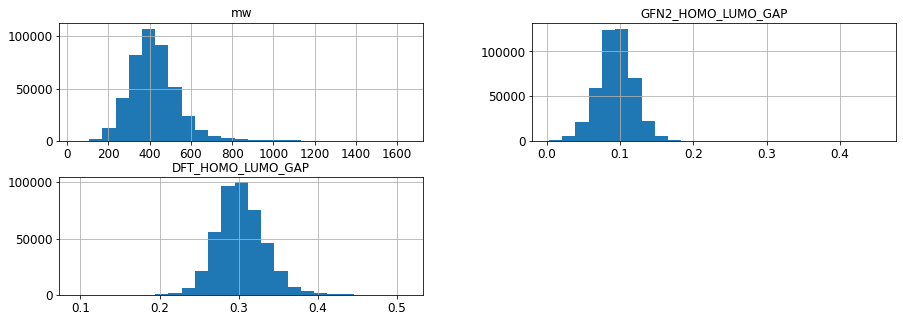

In [30]:
numeric_cols=['mw','GFN2_HOMO_LUMO_GAP','DFT_HOMO_LUMO_GAP']
curated_df[numeric_cols].hist(figsize=(15,5), bins=25);

In [31]:
curated_df[numeric_cols].describe()

,mw,GFN2_HOMO_LUMO_GAP,DFT_HOMO_LUMO_GAP
count,437714.000000,437714.000000,437714.000000
mean,427.250932,0.094931,0.302927
std,133.820222,0.026682,0.030213
min,43.005814,0.003062,0.094158
25%,344.939814,0.079324,0.282935
50%,412.247441,0.094406,0.300713
75%,485.192566,0.110035,0.321532
max,1645.862692,0.454126,0.512243


In [33]:
featurizer = 'ecfp'
model_type ='RF'
response_cols = ['VALUE_NUM_mean']

In [38]:
## Several of these parameters you can modify.  Make sure the columns you call, are actually in your dataset.  model_type has three different options, we can look at RF and NN, chloe used NN in QMUGs training.  
## "splitter" is also a location  to change, several options, but Kevin used scaffold and fingerprint.  
## max_epochs you can start low, and see how that changes the r^2 value.

response_col = ['VALUE_NUM_mean']
compound_id = "compound_id"
smiles_col = "rdkit_smiles"

params = {
        "verbose": "True",
        "datastore": "False",
        "save_results": "False",
        "prediction_type": "regression",
        "dataset_key": curated_file,
        "id_col": compound_id,
        "smiles_col": smiles_col,
        "response_cols": response_col,
        "previously_split": "False",
        "split_only": "False",
        "split_strategy": "train_valid_test",
        "splitter": "scaffold",
        "split_valid_frac": "0.10",
        "split_test_frac": "0.10",
        "featurizer": "ecfp",
        "model_type": "NN",
        "verbose": "True",
        "transformers": "True",
        'max_epochs': '10',
        "rerun": "False",
        "result_dir": ""
        # "ampl_version": " "
    }

In [39]:
ampl_param = parse.wrapper(params)

In [40]:
pl = mp.ModelPipeline(ampl_param)


In [41]:
pl.train_model()

['qm9__curated-Copy1/NN_ecfp_scaffold_regression/c1264b81-2340-435a-a5ba-c1fcbda9b7a4/model/checkpoint1.pt', 'qm9__curated-Copy1/NN_ecfp_scaffold_regression/c1264b81-2340-435a-a5ba-c1fcbda9b7a4/model/checkpoint2.pt', 'qm9__curated-Copy1/NN_ecfp_scaffold_regression/c1264b81-2340-435a-a5ba-c1fcbda9b7a4/model/checkpoint3.pt', 'qm9__curated-Copy1/NN_ecfp_scaffold_regression/c1264b81-2340-435a-a5ba-c1fcbda9b7a4/model/checkpoint4.pt', 'qm9__curated-Copy1/NN_ecfp_scaffold_regression/c1264b81-2340-435a-a5ba-c1fcbda9b7a4/model/checkpoint5.pt']
qm9__curated-Copy1/NN_ecfp_scaffold_regression/c1264b81-2340-435a-a5ba-c1fcbda9b7a4/model/checkpoint1.pt


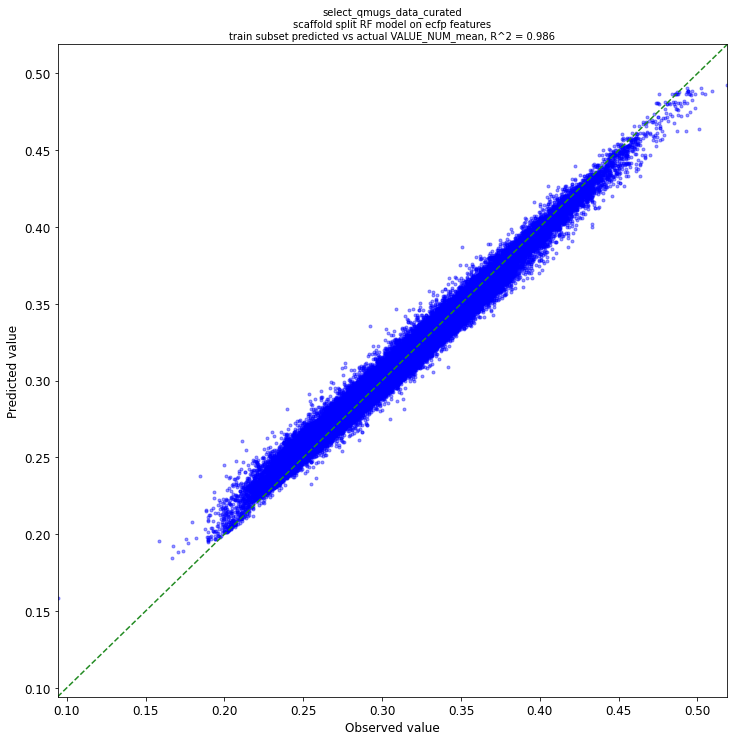

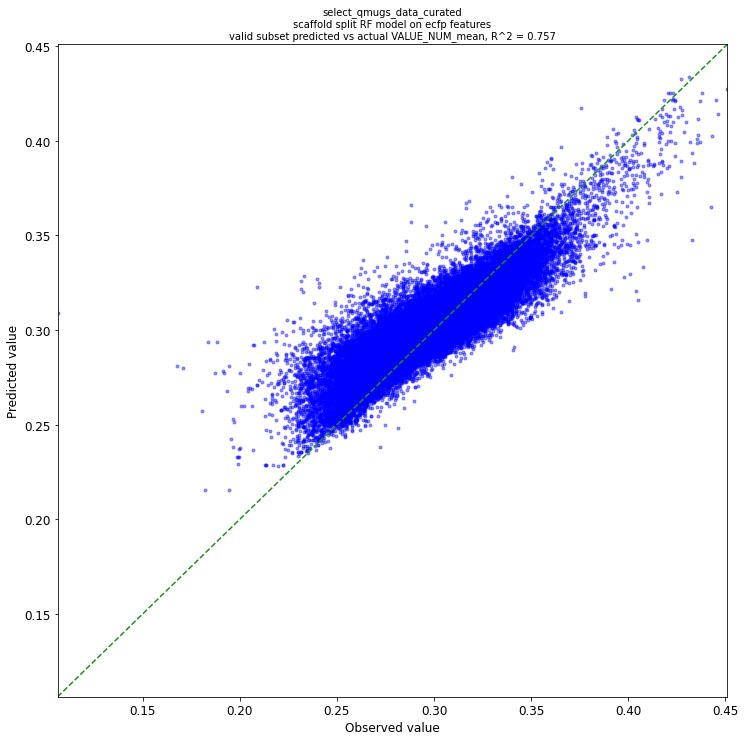

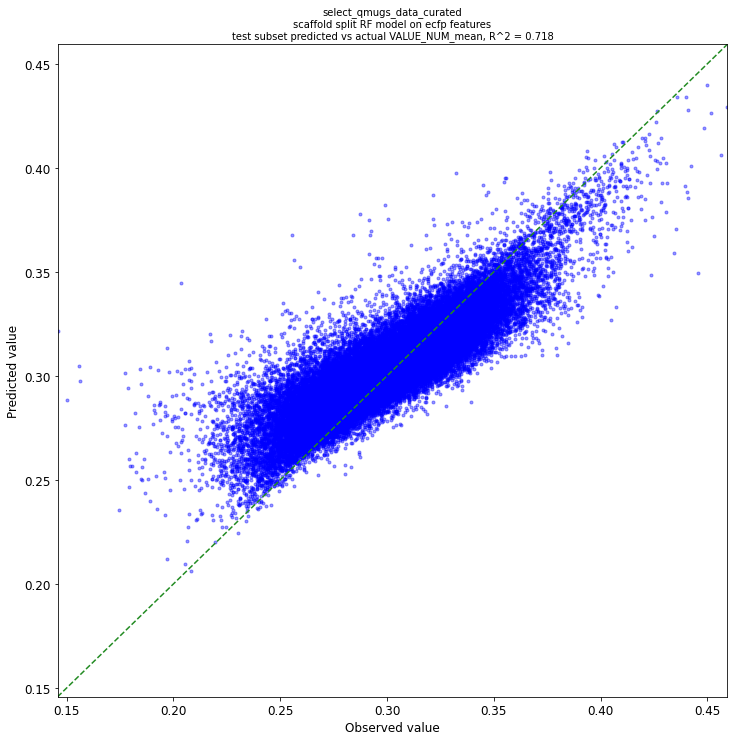

In [61]:
pp.plot_pred_vs_actual(pl)

In [ ]:
pp.plot_perf_vs_epoch(pl)

In [ ]:
from atomsci.ddm.pipeline import chem_diversity as cd

In [ ]:
#htr3a=h1
calc_type='nearest'
dist_metric='tanimoto'
smiles_lst2=curated_df.base_rdkit_smiles.tolist()
#htr3a=htr3a.merge(split_df, left_on='compound_id', right_on='cmpd_id')
#smiles_lst1=htr3a[htr3a.subset=='train'].base_rdkit_smiles.tolist()
#dists=cd.calc_dist_smiles('ECFP',dist_metric,smiles_lst2,smiles_lst1,calc_type)
distsdf=pd.DataFrame([smiles_lst2,list(dists)], columns=range(len(smiles_lst2)), index=['smiles','dists']).T
df=curated_df
df=df.merge(distsdf, left_on='base_rdkit_smiles', right_on='smiles')
print(len(set(smiles_lst2)-set(smiles_lst1)))
print(list(df.loc[df.dists==0, 'compound_id']))

In [4]:
cd /home/jupyter/Summer_AMPL/Renate/QMUGS/Optimal_Model

/home/jupyter/Summer_AMPL/Renate/QMUGS/Optimal_Model


In [5]:
!tar -tf *.tar.gz

./best_model/
./best_model/checkpoint1.pt
./model_metadata.json
./model_metrics.json
./transformers.pkl


In [6]:
!tar -xvzf *.tar.gz

./best_model/
./best_model/checkpoint1.pt
./model_metadata.json
./model_metrics.json
./transformers.pkl


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_context("poster")
sns.set_style("whitegrid")
sns.set_palette("Set2")

import pandas as pd
import os, json, sys, glob, pickle

In [8]:
from atomsci.ddm.pipeline import parameter_parser as parse
from atomsci.ddm.pipeline import perf_data
from atomsci.ddm.pipeline import model_pipeline as mp
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.utils.struct_utils as struct_utils
from atomsci.ddm.pipeline import perf_plots as pp

In [9]:
cd /home/jupyter/Summer_AMPL/Renate/QMUGS/Kevin-retrain-scaffold

/home/jupyter/Summer_AMPL/Renate/QMUGS/Kevin-retrain-scaffold


In [8]:
#test_data = pd.read_csv('select_Kevin_data_curated.csv')
test_data = pd.read_csv('select_qm9_data_curated-Copy1.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'select_qm9_data_curated-Copy1.csv'

In [43]:
test_data.shape

(129435, 13)

In [44]:
test_data.head()

,mol_id,smiles,homo,lumo,gap,rdkit_smiles,inchi_key,compound_id,mol_wt,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate
0,gdb_1,C,-0.3877,0.1171,0.5048,C,VNWKTOKETHGBQD-UHFFFAOYSA-N,VNWKTOKETHGBQD-UHFFFAOYSA-N,16.031300,0.5048,NaN,0.0,0
1,gdb_2,N,-0.2570,0.0829,0.3399,N,QGZKDVFQNNGYKY-UHFFFAOYSA-N,QGZKDVFQNNGYKY-UHFFFAOYSA-N,17.026549,0.3399,NaN,0.0,0
2,gdb_3,O,-0.2928,0.0687,0.3615,O,XLYOFNOQVPJJNP-UHFFFAOYSA-N,XLYOFNOQVPJJNP-UHFFFAOYSA-N,18.010565,0.3615,NaN,0.0,0
3,gdb_4,C#C,-0.2845,0.0506,0.3351,C#C,HSFWRNGVRCDJHI-UHFFFAOYSA-N,HSFWRNGVRCDJHI-UHFFFAOYSA-N,26.015650,0.3351,NaN,0.0,0
4,gdb_5,C#N,-0.3604,0.0191,0.3796,C#N,LELOWRISYMNNSU-UHFFFAOYSA-N,LELOWRISYMNNSU-UHFFFAOYSA-N,27.010899,0.3796,NaN,0.0,0


In [45]:
import os
files = os.listdir()
for f in files: 
  if (f.endswith(".tar.gz")):
    mfile = f 

print(mfile)

select_qmugs_data_curated_model_4308b232-9cd2-4422-8339-e97d70a56e91.tar.gz


In [46]:
from atomsci.ddm.pipeline import predict_from_model as pfm
mfile = "select_qmugs_data_curated_model_4308b232-9cd2-4422-8339-e97d70a56e91.tar.gz"
#mfile = "Summer_AMPL/Renate/Kevin_Model_2/Kevin_Moel/FMO_energy_graphconv_fingerprint_split_model_d852304e-cd01-43b1-91ca-15125b225fc6.tar.gz"
mpath = '/content'
input_df = test_data
response_col = "DFT_HOMO_LUMO_GAP"
compound_id = 'compound_id'
smiles_col = "rdkit_smiles"
results_df = pfm.predict_from_model_file(model_path = mfile, 
                            input_df = input_df, 
                            smiles_col = smiles_col, 
                            response_col = response_col)

Standardizing SMILES strings for 129435 compounds.


2023-07-18 20:56:21,563 Aborting reionization to avoid infinite loop due to it being ambiguous where to put a Hydrogen
2023-07-18 20:56:23,459 Aborting reionization to avoid infinite loop due to it being ambiguous where to put a Hydrogen
2023-07-18 20:56:28,772 Aborting reionization to avoid infinite loop due to it being ambiguous where to put a Hydrogen
2023-07-18 20:56:43,074 Aborting reionization to avoid infinite loop due to it being ambiguous where to put a Hydrogen
2023-07-18 20:56:48,322 Aborting reionization to avoid infinite loop due to it being ambiguous where to put a Hydrogen
2023-07-18 20:56:49,560 Aborting reionization to avoid infinite loop due to it being ambiguous where to put a Hydrogen
2023-07-18 20:56:52,258 Aborting reionization to avoid infinite loop due to it being ambiguous where to put a Hydrogen
2023-07-18 20:56:52,283 Aborting reionization to avoid infinite loop due to it being ambiguous where to put a Hydrogen
2023-07-18 20:57:00,498 Aborting reionization to

num_model_tasks is deprecated and its value is ignored.
['/var/tmp/tmpn8pf9gzd/best_model/checkpoint1.pt']
/var/tmp/tmpn8pf9gzd/best_model/checkpoint1.pt


In [19]:
#results_df = pl.predict_on_dataframe(test_data, contains_responses=True)
results_df.head()

,Unnamed: 0,Unnamed: 0.1,compound_id,SMILES,HOMO_energy,LUMO_energy,HOMO_LUMO_gap,rdkit_smiles,inchi_key,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate,adj_gap,orig_smiles,VALUE_NUM_mean_pred,VALUE_NUM_mean_std
0,0,0,MCKUTUAYYLJECU-UHFFFAOYSA-N,C#Cc1ccc(C#C)c2nsnc12,-6.062700,-2.745630,3.317070,C#Cc1ccc(C#C)c2nsnc12,MCKUTUAYYLJECU-UHFFFAOYSA-N,3.317070,NaN,0.0,0,0.1219,C#Cc1ccc(C#C)c2nsnc12,0.205055,7.298977
1,1,1,MFGYUXHEJZRDAU-UHFFFAOYSA-N,O=C1c2ccsc2-c2scc(-c3cnc4cnccc4c3)c21,-5.760653,-2.704813,3.055840,O=C1c2ccsc2-c2scc(-c3cnc4cnccc4c3)c21,MFGYUXHEJZRDAU-UHFFFAOYSA-N,3.055840,NaN,0.0,0,0.1123,O=C1c2ccsc2-c2scc(-c3cnc4cnccc4c3)c21,0.178658,5.404352
2,2,2,GQZQCROBCYNTMU-UHFFFAOYSA-N,O=C(NNCS(=O)(=O)O)c1ccncc1,-6.974282,-1.039475,5.934807,O=C(NNCS(=O)(=O)O)c1ccncc1,GQZQCROBCYNTMU-UHFFFAOYSA-N,5.934807,NaN,0.0,0,0.2181,O=C(NNCS(=O)(=O)O)c1ccncc1,0.197064,5.781908
3,3,3,VXSOJAGKKDPBDJ-UHFFFAOYSA-N,CNc1c(-c2ccc3c(c2)-c2cc(SC)ccc2C3)ccc2c1Cc1ccc...,-5.164724,-0.897976,4.266748,CNc1c(-c2ccc3c(c2)-c2cc(SC)ccc2C3)ccc2c1Cc1ccc...,VXSOJAGKKDPBDJ-UHFFFAOYSA-N,4.266748,NaN,0.0,0,0.1568,CNc1c(-c2ccc3c(c2)-c2cc(SC)ccc2C3)ccc2c1Cc1ccc...,0.200182,4.738865
4,4,4,UXSNZYGTQTXRAD-UHFFFAOYSA-N,CC(=O)c1ccc(Cl)nc1,-7.031426,-1.948336,5.083090,CC(=O)c1ccc(Cl)nc1,UXSNZYGTQTXRAD-UHFFFAOYSA-N,5.083090,NaN,0.0,0,0.1868,CC(=O)c1ccc(Cl)nc1,0.181916,6.444023


In [20]:
from sklearn.metrics import balanced_accuracy_score
y_true = results_df['adj_gap'].values
y_pred = results_df['VALUE_NUM_mean_pred'].values
#balanced_accuracy_score(y_true, y_pred)

In [21]:
import numpy
actual = results_df['adj_gap'].values
predict = results_df['VALUE_NUM_mean_pred'].values

corr_matrix = numpy.corrcoef(actual, predict)
corr = corr_matrix[0,1]
R_sq = corr**2

print(R_sq)


0.1903534406397871


In [ ]:
#Compare Kevins Data to OMUGS model

In [10]:
pwd

'/home/jupyter/Summer_AMPL/Renate/QMUGS/Kevin-retrain-scaffold'

In [11]:
test_data = pd.read_csv('select_Kevin_data_curated-Copy1.csv')

In [14]:
test_data.head()

,Unnamed: 0,Unnamed: 0.1,compound_id,SMILES,HOMO_energy,LUMO_energy,HOMO_LUMO_gap,rdkit_smiles,inchi_key,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate,adj_gap
0,0,0,MCKUTUAYYLJECU-UHFFFAOYSA-N,C#Cc1ccc(C#C)c2nsnc12,-6.062700,-2.745630,3.317070,C#Cc1ccc(C#C)c2nsnc12,MCKUTUAYYLJECU-UHFFFAOYSA-N,3.317070,NaN,0.0,0,0.1219
1,1,1,MFGYUXHEJZRDAU-UHFFFAOYSA-N,O=C1c2ccsc2-c2scc(-c3cnc4cnccc4c3)c21,-5.760653,-2.704813,3.055840,O=C1c2ccsc2-c2scc(-c3cnc4cnccc4c3)c21,MFGYUXHEJZRDAU-UHFFFAOYSA-N,3.055840,NaN,0.0,0,0.1123
2,2,2,GQZQCROBCYNTMU-UHFFFAOYSA-N,O=C(NNCS(=O)(=O)O)c1ccncc1,-6.974282,-1.039475,5.934807,O=C(NNCS(=O)(=O)O)c1ccncc1,GQZQCROBCYNTMU-UHFFFAOYSA-N,5.934807,NaN,0.0,0,0.2181
3,3,3,VXSOJAGKKDPBDJ-UHFFFAOYSA-N,CNc1c(-c2ccc3c(c2)-c2cc(SC)ccc2C3)ccc2c1Cc1ccc...,-5.164724,-0.897976,4.266748,CNc1c(-c2ccc3c(c2)-c2cc(SC)ccc2C3)ccc2c1Cc1ccc...,VXSOJAGKKDPBDJ-UHFFFAOYSA-N,4.266748,NaN,0.0,0,0.1568
4,4,4,UXSNZYGTQTXRAD-UHFFFAOYSA-N,CC(=O)c1ccc(Cl)nc1,-7.031426,-1.948336,5.083090,CC(=O)c1ccc(Cl)nc1,UXSNZYGTQTXRAD-UHFFFAOYSA-N,5.083090,NaN,0.0,0,0.1868


In [13]:
test_data['adj_gap']=test_data['HOMO_LUMO_gap']/27.2114079527

In [16]:
cd /home/jupyter/Summer_AMPL/Renate/QMUGS/Optimal_Model

/home/jupyter/Summer_AMPL/Renate/QMUGS/Optimal_Model


In [17]:
import os
files = os.listdir()
for f in files: 
  if (f.endswith(".tar.gz")):
    mfile = f 

print(mfile)

select_qm9_data_curated_model_fb039716-e37e-411f-b3c8-c680713dee30.tar.gz


In [18]:
from atomsci.ddm.pipeline import predict_from_model as pfm
mfile = "select_qm9_data_curated_model_fb039716-e37e-411f-b3c8-c680713dee30.tar.gz"
#mfile = "Summer_AMPL/Renate/Kevin_Model_2/Kevin_Moel/FMO_energy_graphconv_fingerprint_split_model_d852304e-cd01-43b1-91ca-15125b225fc6.tar.gz"
mpath = '/content'
input_df = test_data
response_col = "gap"
compound_id = 'compound_id'
smiles_col = "rdkit_smiles"
results_df = pfm.predict_from_model_file(model_path = mfile, 
                            input_df = input_df, 
                            smiles_col = smiles_col, 
                            response_col = response_col)

Standardizing SMILES strings for 37486 compounds.


[19:34:33] Can't kekulize mol.  Unkekulized atoms: 3 10
[19:35:00] Can't kekulize mol.  Unkekulized atoms: 3 10
2023-07-23 19:35:11,862 select_qm9_data_curated_model_fb039716-e37e-411f-b3c8-c680713dee30.tar.gz, 1.5.1
2023-07-23 19:35:11,866 Version compatible check: select_qm9_data_curated_model_fb039716-e37e-411f-b3c8-c680713dee30.tar.gz version = "1.5", AMPL version = "1.5"
2023-07-23 19:35:12,205 ['ampl_version', 'time_generated', 'best_epoch', 'time_built', 'dataset_hash', 'dataset_metadata', 'training_metrics'] are not part of the accepted list of parameters and will be ignored
2023-07-23 19:35:12,479 Created a dataset hash 'ae754ed88fc106c31c9fea2b886ab532' from dataset_key '/home/jupyter/Summer_AMPL/Renate/QM9_Curation/Param_optimization/select_qm9_data_curated.csv'


num_model_tasks is deprecated and its value is ignored.


2023-07-23 19:35:13,420 Featurization = DynamicFeaturization with ecfp features


['/var/tmp/tmpndezp2ro/best_model/checkpoint1.pt']
/var/tmp/tmpndezp2ro/best_model/checkpoint1.pt


In [22]:
results_df.head() #Kevins

,Unnamed: 0,Unnamed: 0.1,compound_id,SMILES,HOMO_energy,LUMO_energy,HOMO_LUMO_gap,rdkit_smiles,inchi_key,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate,adj_gap,orig_smiles,VALUE_NUM_mean_pred,VALUE_NUM_mean_std
0,0,0,MCKUTUAYYLJECU-UHFFFAOYSA-N,C#Cc1ccc(C#C)c2nsnc12,-6.062700,-2.745630,3.317070,C#Cc1ccc(C#C)c2nsnc12,MCKUTUAYYLJECU-UHFFFAOYSA-N,3.317070,NaN,0.0,0,0.1219,C#Cc1ccc(C#C)c2nsnc12,0.205055,7.298977
1,1,1,MFGYUXHEJZRDAU-UHFFFAOYSA-N,O=C1c2ccsc2-c2scc(-c3cnc4cnccc4c3)c21,-5.760653,-2.704813,3.055840,O=C1c2ccsc2-c2scc(-c3cnc4cnccc4c3)c21,MFGYUXHEJZRDAU-UHFFFAOYSA-N,3.055840,NaN,0.0,0,0.1123,O=C1c2ccsc2-c2scc(-c3cnc4cnccc4c3)c21,0.178658,5.404352
2,2,2,GQZQCROBCYNTMU-UHFFFAOYSA-N,O=C(NNCS(=O)(=O)O)c1ccncc1,-6.974282,-1.039475,5.934807,O=C(NNCS(=O)(=O)O)c1ccncc1,GQZQCROBCYNTMU-UHFFFAOYSA-N,5.934807,NaN,0.0,0,0.2181,O=C(NNCS(=O)(=O)O)c1ccncc1,0.197064,5.781908
3,3,3,VXSOJAGKKDPBDJ-UHFFFAOYSA-N,CNc1c(-c2ccc3c(c2)-c2cc(SC)ccc2C3)ccc2c1Cc1ccc...,-5.164724,-0.897976,4.266748,CNc1c(-c2ccc3c(c2)-c2cc(SC)ccc2C3)ccc2c1Cc1ccc...,VXSOJAGKKDPBDJ-UHFFFAOYSA-N,4.266748,NaN,0.0,0,0.1568,CNc1c(-c2ccc3c(c2)-c2cc(SC)ccc2C3)ccc2c1Cc1ccc...,0.200182,4.738865
4,4,4,UXSNZYGTQTXRAD-UHFFFAOYSA-N,CC(=O)c1ccc(Cl)nc1,-7.031426,-1.948336,5.083090,CC(=O)c1ccc(Cl)nc1,UXSNZYGTQTXRAD-UHFFFAOYSA-N,5.083090,NaN,0.0,0,0.1868,CC(=O)c1ccc(Cl)nc1,0.181916,6.444023


In [24]:
import numpy #Kevins
actual = results_df['adj_gap'].values
predict = results_df['VALUE_NUM_mean_pred'].values

corr_matrix = numpy.corrcoef(actual, predict)
corr = corr_matrix[0,1]
R_sq = corr**2

print(R_sq)


0.1903534406397871


In [ ]:
#QMUGS

In [9]:
cd /home/jupyter/Summer_AMPL/Renate/QMUGS/Kevin-retrain-scaffold

/home/jupyter/Summer_AMPL/Renate/QMUGS/Kevin-retrain-scaffold


In [10]:
test_data = pd.read_csv('curated_QMugs_0.7_adj.csv')

In [18]:
#df_sample = test_data.sample(frac=0.7)

In [19]:
test_data.head()

,Unnamed: 0,Unnamed: 0.1,chembl_id,smiles,mw,GFN2_HOMO_LUMO_GAP,DFT_HOMO_LUMO_GAP,rdkit_smiles,inchi_key,compound_id,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate,orig_smiles
0,97904,294835,CHEMBL169083,[H]c1c(C([H])([H])[H])c([H])c(C([H])([H])[H])c...,410.268176,0.117009,0.313565,COCCN(CCOC)c1nc(C)nc2c1c(C)c(C)n2-c1c(C)cc(C)cc1C,DUOINMAEZBCFIG-UHFFFAOYSA-N,DUOINMAEZBCFIG-UHFFFAOYSA-N,0.312912,0.000578,0.208585,0,COCCN(CCOC)c1nc(C)nc2c1c(C)c(C)n2-c1c(C)cc(C)cc1C
1,72269,217448,CHEMBL1511086,[H]c1nc(C([H])([H])[H])c(N2C([H])([H])C([H])([...,399.187067,0.052332,0.277269,Cc1cnc(C)c(N2CCN(Cc3nc(-c4cccc(F)c4F)oc3C)CC2)n1,VEJMHPWUJLAZHK-UHFFFAOYSA-N,VEJMHPWUJLAZHK-UHFFFAOYSA-N,0.282953,0.007160,2.008692,0,Cc1cnc(C)c(N2CCN(Cc3nc(-c4cccc(F)c4F)oc3C)CC2)n1
2,243335,734247,CHEMBL271247,[H]c1c([H])c([H])c(N(C([H])([H])c2c([H])c(Cl)c...,325.134575,0.064064,0.273808,N#Cc1ccc(Cl)cc1CN(c1ccccc1)C1CCNCC1,RWCCKHBTGXKDKL-UHFFFAOYSA-N,RWCCKHBTGXKDKL-UHFFFAOYSA-N,0.275212,0.002066,0.510303,0,N#Cc1ccc(Cl)cc1CN(c1ccccc1)C1CCNCC1
3,191238,576862,CHEMBL222107,[H]OC(=O)[C@]([H])(C([H])([H])c1c([H])nc(OC([H...,408.204907,0.110230,0.306831,Cc1oc(-c2ccccc2)nc1CCOc1ccc(C[C@H](CC(C)C)C(=O...,PZBKYICTVQFMDF-FQEVSTJZSA-N,PZBKYICTVQFMDF-FQEVSTJZSA-N,0.304123,0.004618,0.890283,0,Cc1oc(-c2ccccc2)nc1CCOc1ccc(C[C@H](CC(C)C)C(=O...
4,411224,1243109,CHEMBL3729230,[H]Oc1c([H])c([H])c(C(=O)N(c2c([H])c([H])c(-c3...,580.178041,0.099695,0.291448,Cc1cc(S(=O)(=O)NCc2cccnc2)cnc1-c1ccc(N(Cc2cccc...,BGNSNJNOWXVGOS-UHFFFAOYSA-N,BGNSNJNOWXVGOS-UHFFFAOYSA-N,0.294735,0.006346,1.115123,0,Cc1cc(S(=O)(=O)NCc2cccnc2)cnc1-c1ccc(N(Cc2cccc...


In [12]:
df_sample.shape

NameError: name 'df_sample' is not defined

In [18]:
cd /home/jupyter/Summer_AMPL/Renate/QMUGS/Optimal_Model

/home/jupyter/Summer_AMPL/Renate/QMUGS/Optimal_Model


In [20]:
import os
files = os.listdir()
for f in files: 
  if (f.endswith(".tar.gz")):
    mfile = f 

print(mfile)

select_qm9_data_curated_model_fb039716-e37e-411f-b3c8-c680713dee30.tar.gz


In [21]:
from atomsci.ddm.pipeline import predict_from_model as pfm
mfile = "select_qm9_data_curated_model_fb039716-e37e-411f-b3c8-c680713dee30.tar.gz"
#mfile = "Summer_AMPL/Renate/Kevin_Model_2/Kevin_Moel/FMO_energy_graphconv_fingerprint_split_model_d852304e-cd01-43b1-91ca-15125b225fc6.tar.gz"
mpath = '/content'
input_df = test_data
response_col = "gap"
compound_id = 'compound_id'
smiles_col = "rdkit_smiles"
results_df = pfm.predict_from_model_file(model_path = mfile, 
                            input_df = input_df, 
                            smiles_col = smiles_col, 
                            response_col = response_col)

Standardizing SMILES strings for 306400 compounds.


[21:28:43] Can't kekulize mol.  Unkekulized atoms: 3 5 26 27 28 29
[21:30:29] Can't kekulize mol.  Unkekulized atoms: 3 9 10 13 14 17
[21:31:32] Can't kekulize mol.  Unkekulized atoms: 3 5 27 28 29 31
[21:33:37] Can't kekulize mol.  Unkekulized atoms: 3 9 10 11 12 13
[21:33:37] Can't kekulize mol.  Unkekulized atoms: 3 11 12 15 16 19
[21:33:37] Can't kekulize mol.  Unkekulized atoms: 3 9 10 13 14 17
[21:35:38] Can't kekulize mol.  Unkekulized atoms: 3 5 25 26 27 28
2023-07-24 21:35:53,823 select_qm9_data_curated_model_fb039716-e37e-411f-b3c8-c680713dee30.tar.gz, 1.5.1
2023-07-24 21:35:53,828 Version compatible check: select_qm9_data_curated_model_fb039716-e37e-411f-b3c8-c680713dee30.tar.gz version = "1.5", AMPL version = "1.5"


num_model_tasks is deprecated and its value is ignored.
['/var/tmp/tmp95p1hljk/best_model/checkpoint1.pt']
/var/tmp/tmp95p1hljk/best_model/checkpoint1.pt


In [22]:
results_df.head() #QMUGS

,Unnamed: 0,Unnamed: 0.1,chembl_id,smiles,mw,GFN2_HOMO_LUMO_GAP,DFT_HOMO_LUMO_GAP,rdkit_smiles,inchi_key,compound_id,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate,orig_smiles,VALUE_NUM_mean_pred,VALUE_NUM_mean_std
0,97904,294835,CHEMBL169083,[H]c1c(C([H])([H])[H])c([H])c(C([H])([H])[H])c...,410.268176,0.117009,0.313565,COCCN(CCOC)c1nc(C)nc2c1c(C)c(C)n2-c1c(C)cc(C)cc1C,DUOINMAEZBCFIG-UHFFFAOYSA-N,DUOINMAEZBCFIG-UHFFFAOYSA-N,0.312912,0.000578,0.208585,0,COCCN(CCOC)c1nc(C)nc2c1c(C)c(C)n2-c1c(C)cc(C)cc1C,0.201014,4.448341
1,72269,217448,CHEMBL1511086,[H]c1nc(C([H])([H])[H])c(N2C([H])([H])C([H])([...,399.187067,0.052332,0.277269,Cc1cnc(C)c(N2CCN(Cc3nc(-c4cccc(F)c4F)oc3C)CC2)n1,VEJMHPWUJLAZHK-UHFFFAOYSA-N,VEJMHPWUJLAZHK-UHFFFAOYSA-N,0.282953,0.007160,2.008692,0,Cc1cnc(C)c(N2CCN(Cc3nc(-c4cccc(F)c4F)oc3C)CC2)n1,0.198234,5.630110
2,243335,734247,CHEMBL271247,[H]c1c([H])c([H])c(N(C([H])([H])c2c([H])c(Cl)c...,325.134575,0.064064,0.273808,N#Cc1ccc(Cl)cc1CN(c1ccccc1)C1CCNCC1,RWCCKHBTGXKDKL-UHFFFAOYSA-N,RWCCKHBTGXKDKL-UHFFFAOYSA-N,0.275212,0.002066,0.510303,0,N#Cc1ccc(Cl)cc1CN(c1ccccc1)C1CCNCC1,0.192413,5.961844
3,191238,576862,CHEMBL222107,[H]OC(=O)[C@]([H])(C([H])([H])c1c([H])nc(OC([H...,408.204907,0.110230,0.306831,Cc1oc(-c2ccccc2)nc1CCOc1ccc(C[C@H](CC(C)C)C(=O...,PZBKYICTVQFMDF-FQEVSTJZSA-N,PZBKYICTVQFMDF-FQEVSTJZSA-N,0.304123,0.004618,0.890283,0,Cc1oc(-c2ccccc2)nc1CCOc1ccc(C[C@H](CC(C)C)C(=O...,0.202091,6.111714
4,411224,1243109,CHEMBL3729230,[H]Oc1c([H])c([H])c(C(=O)N(c2c([H])c([H])c(-c3...,580.178041,0.099695,0.291448,Cc1cc(S(=O)(=O)NCc2cccnc2)cnc1-c1ccc(N(Cc2cccc...,BGNSNJNOWXVGOS-UHFFFAOYSA-N,BGNSNJNOWXVGOS-UHFFFAOYSA-N,0.294735,0.006346,1.115123,0,Cc1cc(S(=O)(=O)NCc2cccnc2)cnc1-c1ccc(N(Cc2cccc...,0.199025,5.942921


In [23]:
import numpy #QMUGS
actual = results_df['DFT_HOMO_LUMO_GAP'].values
predict = results_df['VALUE_NUM_mean_pred'].values

corr_matrix = numpy.corrcoef(actual, predict)
corr = corr_matrix[0,1]
R_sq = corr**2

print(R_sq)


0.1610517380022998


In [ ]:
import numpy #QMUGS
actual = results_df['VALUE_NUM_mean'].values
predict = results_df['VALUE_NUM_mean_pred'].values

corr_matrix = numpy.corrcoef(actual, predict)
corr = corr_matrix[0,1]
R_sq = corr**2

print(R_sq)
